In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 
from sklearn.preprocessing import StandardScaler

In [2]:
%matplotlib inline

In [3]:
path=r'C:\Users\rjbbl\OneDrive\Desktop\achievement 6\Sepsis Analysis Feb 24 2023'

In [4]:
df_clean = pd.read_csv(os.path.join(path,'02 Data Folder','data_clean.csv'), index_col = False)

In [5]:
df_clean.shape

(1552210, 30)

In [6]:
df_clean.head()

,Unnamed: 0.1,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,...,PTT,WBC,Fibrinogen,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,0,0,84.58,97.19,36.98,123.75,82.4,63.8,18.7,...,41.23,11.44,287.38,196.01,68.54,0,-0.02,1,0,17072
1,1,1,1,65.00,100.00,36.98,123.75,72.0,63.8,16.5,...,41.23,11.44,287.38,196.01,68.54,0,-0.02,2,0,17072
2,2,2,2,78.00,100.00,36.98,123.75,42.5,63.8,18.7,...,41.23,11.44,287.38,196.01,68.54,0,-0.02,3,0,17072
3,3,3,3,73.00,100.00,36.98,123.75,82.4,63.8,17.0,...,41.23,11.44,287.38,196.01,68.54,0,-0.02,4,0,17072
4,4,4,4,70.00,100.00,36.98,129.00,74.0,69.0,14.0,...,30.60,11.30,287.38,330.00,68.54,0,-0.02,5,0,17072


In [7]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552210 entries, 0 to 1552209
Data columns (total 30 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0.1     1552210 non-null  int64  
 1   Unnamed: 0       1552210 non-null  int64  
 2   Hour             1552210 non-null  int64  
 3   HR               1552210 non-null  float64
 4   O2Sat            1552210 non-null  float64
 5   Temp             1552210 non-null  float64
 6   SBP              1552210 non-null  float64
 7   MAP              1552210 non-null  float64
 8   DBP              1552210 non-null  float64
 9   Resp             1552210 non-null  float64
 10  BaseExcess       1552210 non-null  float64
 11  HCO3             1552210 non-null  float64
 12  FiO2             1552210 non-null  float64
 13  pH               1552210 non-null  float64
 14  PaCO2            1552210 non-null  float64
 15  SaO2             1552210 non-null  float64
 16  Lactate          1

In [8]:
df_clean.describe()

,Unnamed: 0.1,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,...,PTT,WBC,Fibrinogen,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
count,1.552210e+06,1.552210e+06,1.552210e+06,1.552210e+06,1.552210e+06,1.552210e+06,1.552210e+06,1.552210e+06,1.552210e+06,1.552210e+06,...,1.552210e+06,1.552210e+06,1.552210e+06,1.552210e+06,1.552210e+06,1.552210e+06,1.552202e+06,1.552210e+06,1.552210e+06,1.552210e+06
mean,7.761045e+05,2.549274e+01,2.549274e+01,8.458130e+01,9.719344e+01,3.697906e+01,1.237504e+02,8.240009e+01,6.382098e+01,1.872243e+01,...,4.123004e+01,1.144041e+01,2.873800e+02,1.960102e+02,6.200947e+01,5.592690e-01,-5.612512e+01,2.699499e+01,1.798468e-02,5.920148e+04
std,4.480846e+05,2.888256e+01,2.888256e+01,1.644688e+01,2.738418e+00,4.479177e-01,2.147167e+01,1.529056e+01,1.156365e+01,4.690498e+00,...,4.498498e+00,1.956839e+00,1.242784e+01,2.525906e+01,1.638622e+01,4.964749e-01,1.622569e+02,2.900542e+01,1.328956e-01,5.024819e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,2.000000e+01,2.090000e+01,2.000000e+01,2.000000e+01,2.000000e+01,1.000000e+00,...,1.250000e+01,1.000000e-01,3.400000e+01,1.000000e+00,1.400000e+01,0.000000e+00,-5.366860e+03,1.000000e+00,0.000000e+00,1.000000e+00
25%,3.880522e+05,9.000000e+00,9.000000e+00,7.400000e+01,9.600000e+01,3.698000e+01,1.090000e+02,7.200000e+01,5.800000e+01,1.600000e+01,...,4.123000e+01,1.144000e+01,2.873800e+02,1.960100e+02,5.168000e+01,0.000000e+00,-4.705000e+01,1.100000e+01,0.000000e+00,9.990000e+03
50%,7.761045e+05,1.900000e+01,1.900000e+01,8.458000e+01,9.719000e+01,3.698000e+01,1.237500e+02,8.240000e+01,6.380000e+01,1.870000e+01,...,4.123000e+01,1.144000e+01,2.873800e+02,1.960100e+02,6.400000e+01,1.000000e+00,-6.030000e+00,2.100000e+01,0.000000e+00,1.996500e+04
75%,1.164157e+06,3.300000e+01,3.300000e+01,9.400000e+01,9.900000e+01,3.698000e+01,1.350000e+02,9.000000e+01,6.700000e+01,2.100000e+01,...,4.123000e+01,1.144000e+01,2.873800e+02,1.960100e+02,7.400000e+01,1.000000e+00,-4.000000e-02,3.400000e+01,0.000000e+00,1.098780e+05
max,1.552209e+06,3.350000e+02,3.350000e+02,2.800000e+02,1.000000e+02,5.000000e+01,3.000000e+02,3.000000e+02,3.000000e+02,1.000000e+02,...,2.500000e+02,4.400000e+02,1.760000e+03,2.322000e+03,1.000000e+02,1.000000e+00,2.399000e+01,3.360000e+02,1.000000e+00,1.200000e+05


In [9]:
df_clean.isnull().sum()

Unnamed: 0.1       0
Unnamed: 0         0
Hour               0
HR                 0
O2Sat              0
Temp               0
SBP                0
MAP                0
DBP                0
Resp               0
BaseExcess         0
HCO3               0
FiO2               0
pH                 0
PaCO2              0
SaO2               0
Lactate            0
Bilirubin_total    0
Hct                0
Hgb                0
PTT                0
WBC                0
Fibrinogen         0
Platelets          0
Age                0
Gender             0
HospAdmTime        8
ICULOS             0
SepsisLabel        0
Patient_ID         0
dtype: int64

In [10]:
df_clean3=df_clean[['HCO3', 'Temp', 'ICULOS','HR']]
df_clean3

,HCO3,Temp,ICULOS,HR
0,24.07,36.98,1,84.58
1,24.07,36.98,2,65.00
2,24.07,36.98,3,78.00
3,24.07,36.98,4,73.00
4,26.00,36.98,5,70.00
...,...,...,...,...
1552205,24.07,36.98,22,83.00
1552206,24.07,36.98,23,80.00
1552207,24.07,36.70,24,95.00
1552208,24.07,36.98,25,104.00


In [11]:
scaler=StandardScaler()

In [12]:
columns=['HCO3','Temp','ICULOS','HR']#'Index'

In [13]:
df_scale=pd.DataFrame(scaler.fit_transform(df_clean3),columns=columns)
df_scale.head

<bound method NDFrame.head of              HCO3      Temp    ICULOS        HR
0       -0.000256  0.002094 -0.896212 -0.000079
1       -0.000256  0.002094 -0.861736 -1.190579
2       -0.000256  0.002094 -0.827259 -0.400155
3       -0.000256  0.002094 -0.792783 -0.704164
4        2.154301  0.002094 -0.758307 -0.886570
...           ...       ...       ...       ...
1552205 -0.000256  0.002094 -0.172209 -0.096146
1552206 -0.000256  0.002094 -0.137733 -0.278551
1552207 -0.000256 -0.623021 -0.103256  0.633476
1552208 -0.000256  0.002094 -0.068780  1.180692
1552209 -0.000256  0.002094 -0.034304  0.603075

[1552210 rows x 4 columns]>

# Elbow Technique


In [14]:
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [15]:
score = [kmeans[i].fit(df_scale).score(df_scale) for i in range(len(kmeans))]


score

C:\Users\rjbbl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rjbbl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rjbbl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rjbbl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rjbbl\anaconda3\lib\site-packages\sklearn\clust

[-6208840.000000099,
 -5168624.961622954,
 -4286978.842212635,
 -3727921.8252286273,
 -3206893.2365040523,
 -2672930.9958526394,
 -2248845.9164817003,
 -1970094.7606512802,
 -1815283.3064703585]

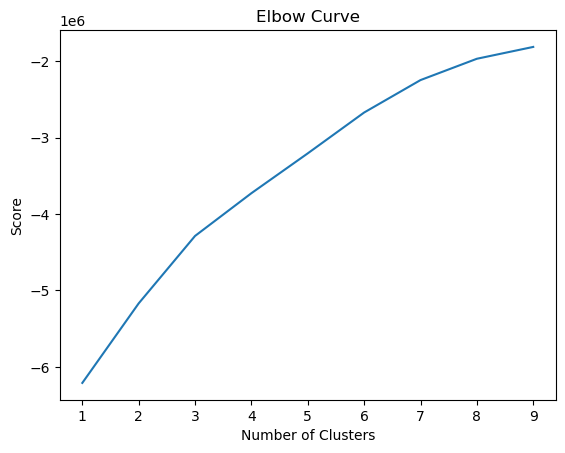

In [16]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# This elbow curve does show there are two places the curve flattens slightly around 3.5 and then again around 7  so I stayed with three clusters. My tutor also helped me reshape to get a better looking cluster.

In [17]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3)

In [18]:

kmeans.fit(df_scale)

C:\Users\rjbbl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [19]:
df_scale['clusters'] = kmeans.fit_predict(df_scale)

C:\Users\rjbbl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [20]:
df_scale.head

<bound method NDFrame.head of              HCO3      Temp    ICULOS        HR  clusters
0       -0.000256  0.002094 -0.896212 -0.000079         1
1       -0.000256  0.002094 -0.861736 -1.190579         1
2       -0.000256  0.002094 -0.827259 -0.400155         1
3       -0.000256  0.002094 -0.792783 -0.704164         1
4        2.154301  0.002094 -0.758307 -0.886570         1
...           ...       ...       ...       ...       ...
1552205 -0.000256  0.002094 -0.172209 -0.096146         1
1552206 -0.000256  0.002094 -0.137733 -0.278551         1
1552207 -0.000256 -0.623021 -0.103256  0.633476         2
1552208 -0.000256  0.002094 -0.068780  1.180692         2
1552209 -0.000256  0.002094 -0.034304  0.603075         2

[1552210 rows x 5 columns]>

In [21]:
df_scale['clusters'].value_counts()

1    978733
2    520463
0     53014
Name: clusters, dtype: int64

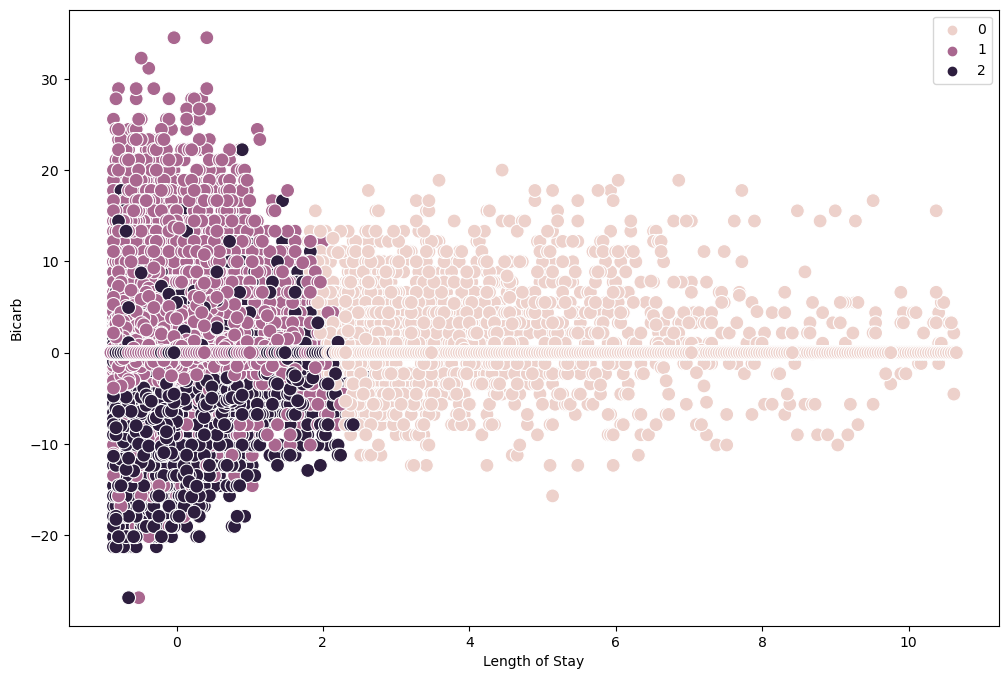

In [22]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scale['ICULOS'], y=df_scale['HCO3'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Length of Stay') # Label x-axis.
plt.ylabel('Bicarb') # Label y-axis.
plt.show()

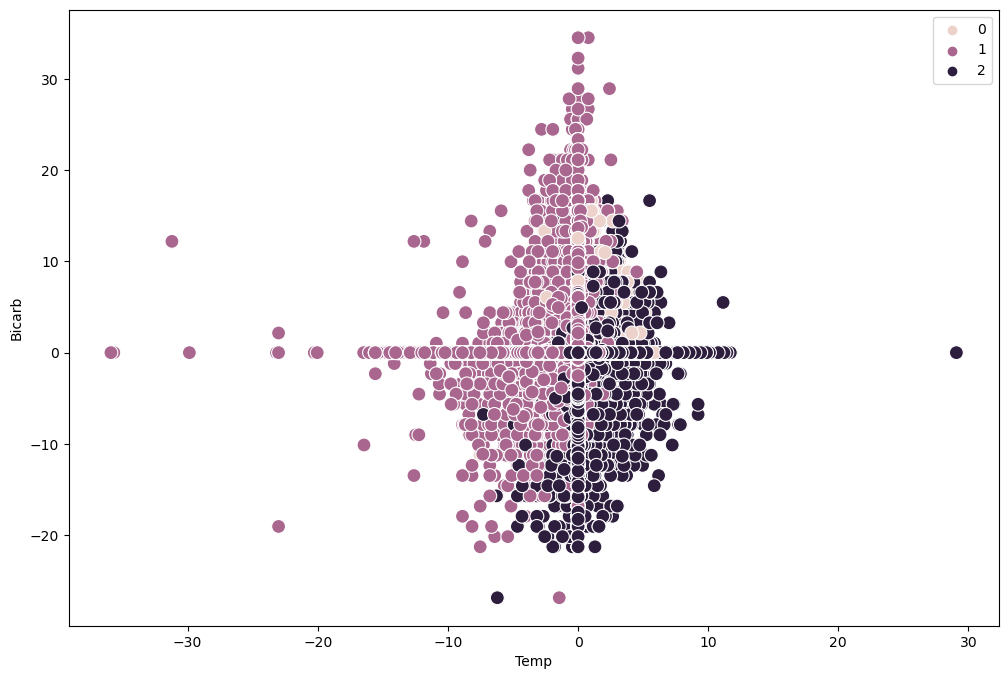

In [23]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scale['Temp'], y=df_scale['HCO3'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Temp') 
plt.ylabel('Bicarb') 
plt.show()

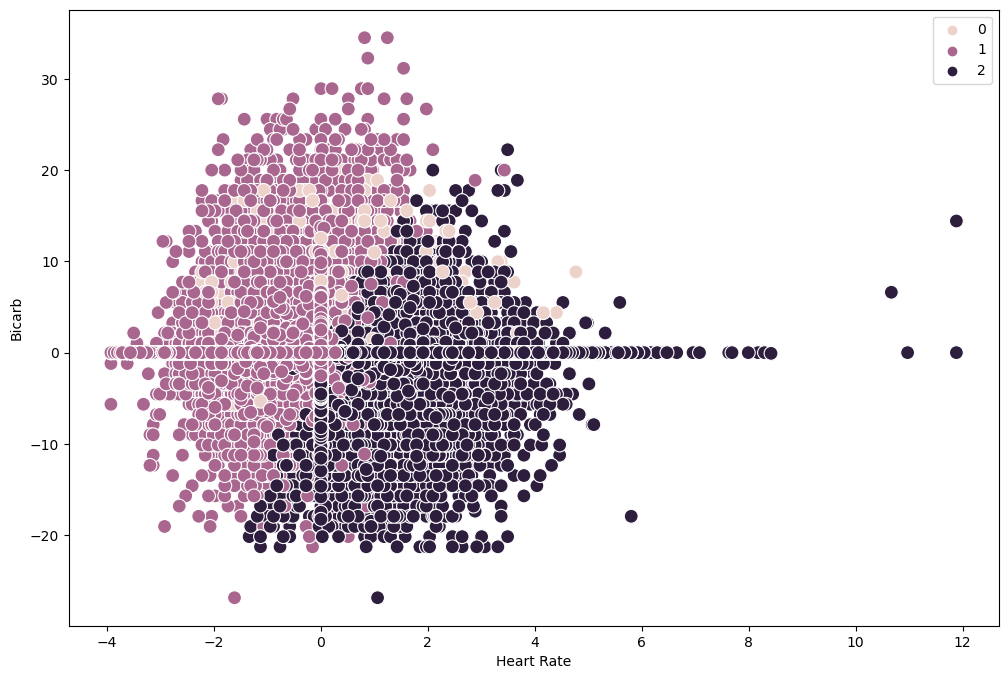

In [24]:


plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scale['HR'], y=df_scale['HCO3'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Heart Rate') 
plt.ylabel('Bicarb') 
plt.show()

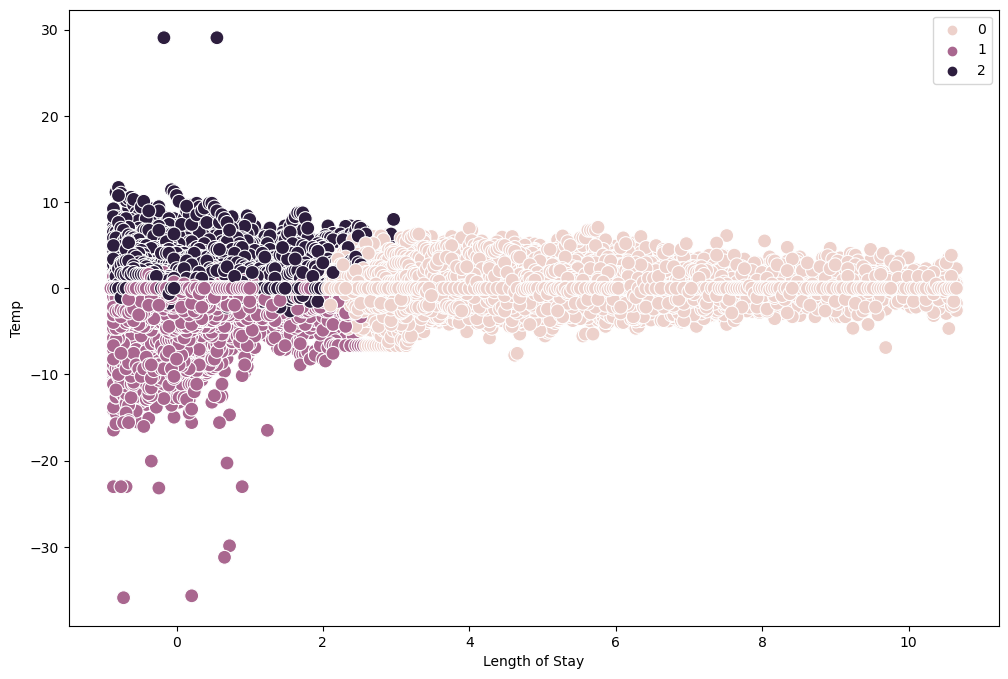

In [25]:

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scale['ICULOS'], y=df_scale['Temp'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Length of Stay') 
plt.ylabel('Temp') 
plt.show()

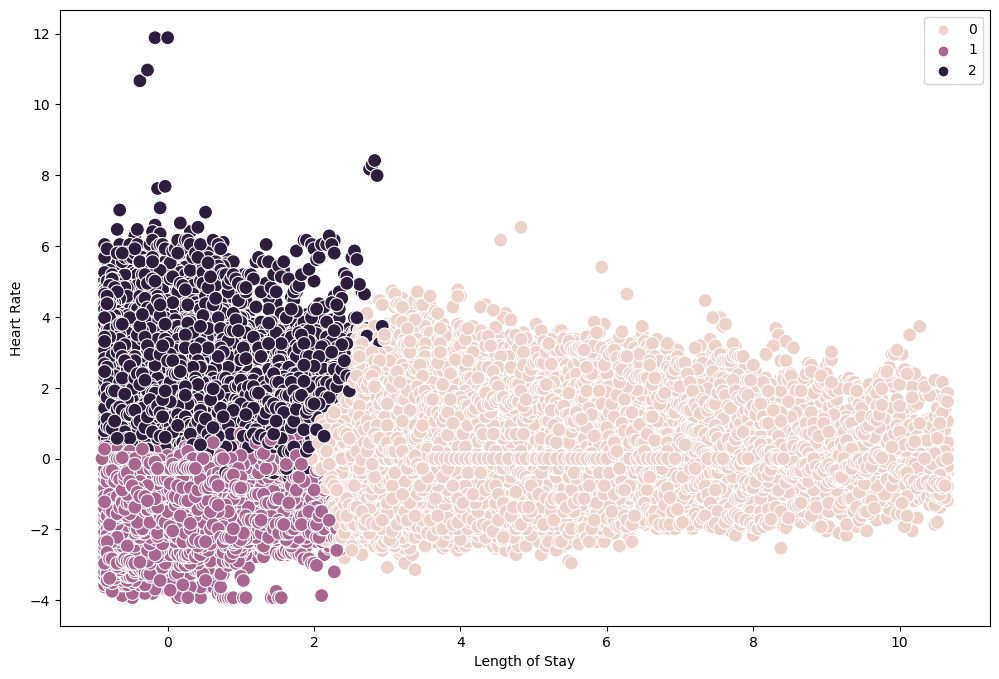

In [26]:

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scale['ICULOS'], y=df_scale['HR'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Length of Stay') 
plt.ylabel('Heart Rate') 
plt.show()

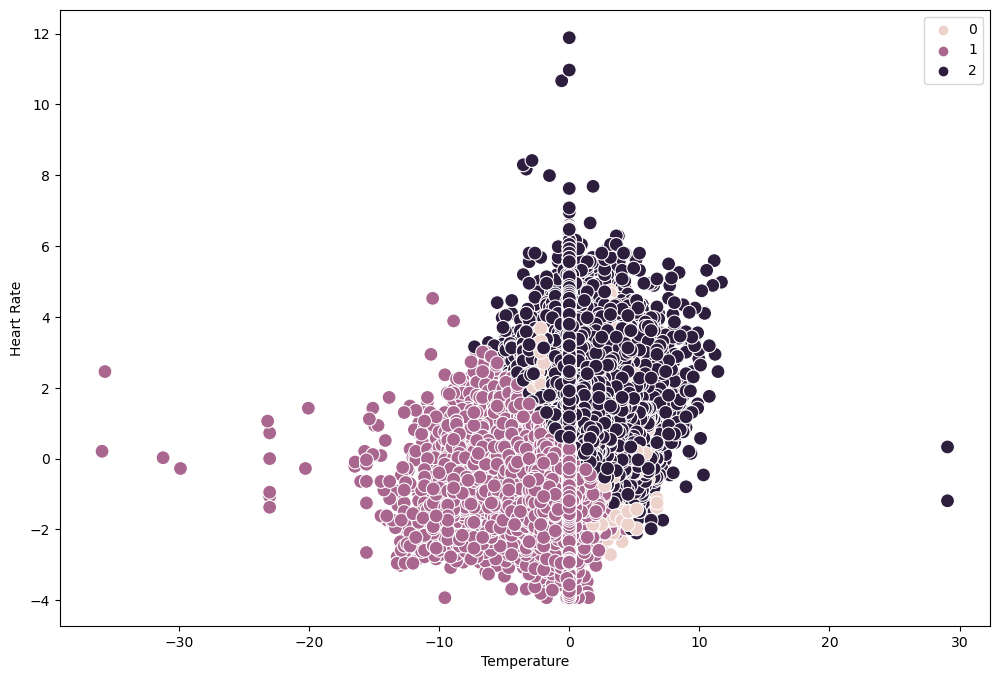

In [27]:

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scale['Temp'], y=df_scale['HR'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Temperature') 
plt.ylabel('Heart Rate') 
plt.show()

In [28]:
df_scale.loc[df_scale['clusters'] == 2, 'clusters'] = 'dark purple'
df_scale.loc[df_scale['clusters'] == 1, 'clusters'] = 'purple'
df_scale.loc[df_scale['clusters'] == 0, 'clusters'] = 'pink'

In [29]:
df_scale.groupby('clusters').agg({'ICULOS':['mean', 'median'], 
                         'HCO3':['mean', 'median'], 
                         'Temp':['mean', 'median'],
                          'HR':['mean', 'median']})

ICULOS                HCO3                Temp            \
                 mean    median      mean    median      mean    median   
clusters                                                                  
dark purple -0.095259 -0.172209 -0.089009 -0.000256  0.457813  0.002094   
pink         4.159673  3.654663  0.087002 -0.000256  0.135978  0.002094   
purple      -0.174656 -0.275638  0.042620 -0.000256 -0.250818  0.002094   

                   HR            
                 mean    median  
clusters                         
dark purple  0.989837  0.876683  
pink         0.167797  0.025458  
purple      -0.535457 -0.400155

# Cluster explanation:
    I ran each of my four variables against each other and they seem to make sense. 
    The dark purple is the most number of dots for each graph as they had the highest number in that cluster.
    
For most of the length of stay values there were more dark purple and purple with pink being toward the longer length of stay
It is interesting that the HCO3 had a lower mean in the dark purple and the lowest in the purple. That is one clincial value that I thought would trend differently. The Temp is almost opposite of the HCO3 overall for means they are almost opposite. The Heart Rate is also opposite of the HCO3. ICU Length of stay for sure has the highest mean in the pink from any other group by an alarming margin. Even when clustered some of the scatter plots look close to what we did the last few assignmnets. 
